In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [12]:
df = pd.read_csv('FUTIDX_BANKNIFTY_01-Mar-2020_TO_01-Jun-2020.csv')

In [13]:
df.columns

Index(['Symbol  ', 'Date  ', 'Expiry  ', 'Open  ', 'High  ', 'Low  ',
       'Close  ', 'LTP  ', 'Settle Price  ', 'No. of contracts  ',
       'Turnover * in   ₹ Lakhs', 'Open Int  ', 'Change in OI  ',
       'Underlying Value  '],
      dtype='object')

In [14]:
# remove extra spaces
df.columns = df.columns.str.strip()

In [15]:
df.columns

Index(['Symbol', 'Date', 'Expiry', 'Open', 'High', 'Low', 'Close', 'LTP',
       'Settle Price', 'No. of contracts', 'Turnover * in   ₹ Lakhs',
       'Open Int', 'Change in OI', 'Underlying Value'],
      dtype='object')

In [16]:
df['Expiry'] = pd.to_datetime(df['Expiry'], format='%d-%b-%Y')

In [17]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%Y')

In [18]:
df['T'] = (df['Expiry']- df['Date']).dt.days/365

In [19]:
#interest rate
r = 0.044

In [20]:
df['Model_price'] = df['Underlying Value'] * np.exp(r*df['T'])

In [23]:
df['Spot_price'] = df['Underlying Value']

In [25]:
# Date,Settle Price, Model Price, Spot Price

output_df = df[['Date', 'Settle Price', 'Model_price', 'Spot_price']]


In [27]:
output_df.head()

,Date,Settle Price,Model_price,Spot_price
0,2020-03-02,29121.30,29172.755489,28868.40
1,2020-03-03,29364.70,29481.105441,29177.05
2,2020-03-04,28914.35,28948.811656,28653.70
3,2020-03-05,29018.65,29108.617334,28815.35
4,2020-03-06,27976.20,28081.013086,27801.45


In [29]:
output_df.to_csv('output.csv', index = False) 

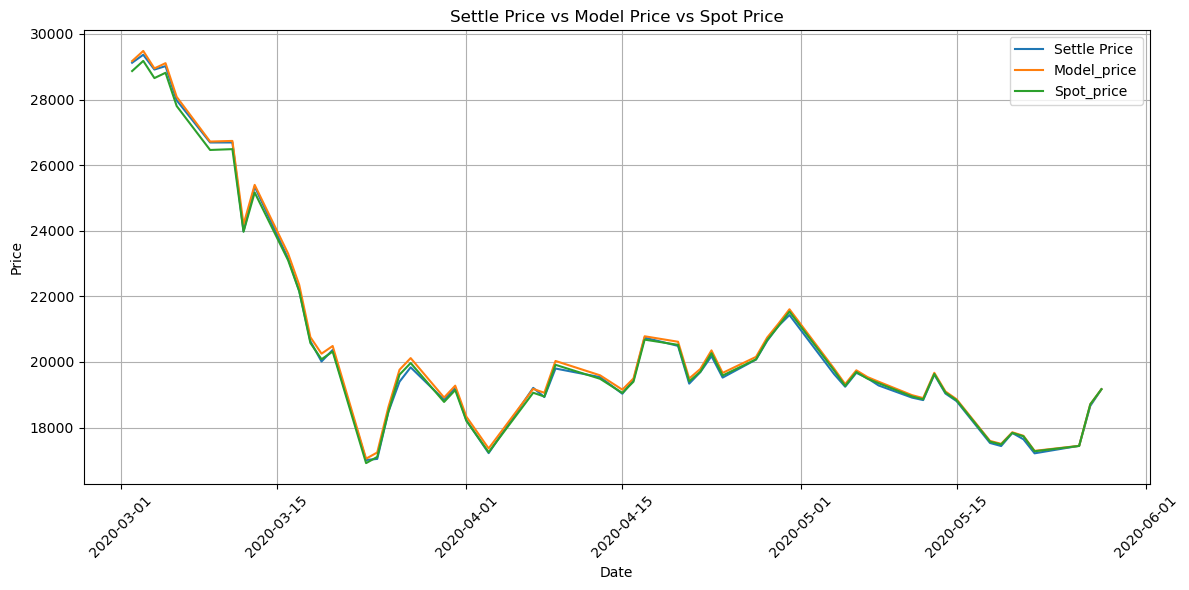

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(output_df['Date'], output_df['Settle Price'], label='Settle Price')
plt.plot(output_df['Date'], output_df['Model_price'], label='Model_price')
plt.plot(output_df['Date'], output_df['Spot_price'], label='Spot_price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Settle Price vs Model Price vs Spot Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [39]:
# Back-calculate the interest rate
output_df.loc[:, 'Calculated Interest Rate'] = np.log(output_df['Settle Price'] / output_df['Spot_price']) / df['T']

# Calculate the mean interest rate
mean_interest_rate = output_df['Calculated Interest Rate'].mean()

# Calculate the percentage error
percentage_error = abs(mean_interest_rate - r) / r * 100

mean_interest_rate, percentage_error

/var/folders/rg/0ybjf1y174b6jy_txv878fjh0000gn/T/ipykernel_17190/2257787172.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output_df.loc[:, 'Calculated Interest Rate'] = np.log(output_df['Settle Price'] / output_df['Spot_price']) / df['T']


(-0.03264917983309256, 174.20268143884672)

In [40]:
df

,Symbol,Date,Expiry,Open,High,Low,Close,LTP,Settle Price,No. of contracts,Turnover * in ₹ Lakhs,Open Int,Change in OI,Underlying Value,T,Model_price,Spot_price
0,BANKNIFTY,2020-03-02,2020-05-28,29718.95,29800.00,28820.00,29121.30,29119.30,29121.30,2020.0,11865.70,37940.0,35660.0,28868.40,0.238356,29172.755489,28868.40
1,BANKNIFTY,2020-03-03,2020-05-28,29319.95,29500.00,28990.25,29364.70,29479.00,29364.70,1477.0,8647.28,48020.0,10080.0,29177.05,0.235616,29481.105441,29177.05
2,BANKNIFTY,2020-03-04,2020-05-28,29354.75,29354.75,28374.25,28914.35,28950.70,28914.35,536.0,3095.86,49740.0,1720.0,28653.70,0.232877,28948.811656,28653.70
3,BANKNIFTY,2020-03-05,2020-05-28,29194.75,29369.00,28777.00,29018.65,28984.10,29018.65,330.0,1919.40,49700.0,-40.0,28815.35,0.230137,29108.617334,28815.35
4,BANKNIFTY,2020-03-06,2020-05-28,27924.35,28500.00,27505.70,27976.20,27960.00,27976.20,588.0,3277.28,53280.0,3580.0,27801.45,0.227397,28081.013086,27801.45
5,BANKNIFTY,2020-03-09,2020-05-28,27178.45,27366.55,26140.70,26690.70,26703.15,26690.70,2036.0,10942.98,54240.0,960.0,26462.60,0.219178,26719.035488,26462.60
6,BANKNIFTY,2020-03-11,2020-05-28,26690.70,27000.00,26470.00,26691.55,26692.35,26691.55,277.0,1481.45,54320.0,80.0,26487.80,0.213699,26738.032481,26487.80
7,BANKNIFTY,2020-03-12,2020-05-28,25367.40,25500.00,23676.60,23979.15,24328.00,23979.15,786.0,3877.88,55760.0,1440.0,23971.15,0.210959,24194.690680,23971.15
8,BANKNIFTY,2020-03-13,2020-05-28,22831.90,25798.55,21585.10,25347.80,25432.65,25347.80,676.0,3270.24,54660.0,-1100.0,25166.45,0.208219,25398.075466,25166.45
9,BANKNIFTY,2020-03-16,2020-05-28,24900.00,24900.00,23000.00,23156.40,23100.00,23156.40,546.0,2585.55,56160.0,1500.0,23101.15,0.200000,23305.337226,23101.15


In [41]:
output_df

,Date,Settle Price,Model_price,Spot_price,Calculated Interest Rate
0,2020-03-02,29121.30,29172.755489,28868.40,0.036594
1,2020-03-03,29364.70,29481.105441,29177.05,0.027209
2,2020-03-04,28914.35,28948.811656,28653.70,0.038885
3,2020-03-05,29018.65,29108.617334,28815.35,0.030549
4,2020-03-06,27976.20,28081.013086,27801.45,0.027555
5,2020-03-09,26690.70,26719.035488,26462.60,0.039159
6,2020-03-11,26691.55,26738.032481,26487.80,0.035858
7,2020-03-12,23979.15,24194.690680,23971.15,0.001582
8,2020-03-13,25347.80,25398.075466,25166.45,0.034484
9,2020-03-16,23156.40,23305.337226,23101.15,0.011944
